In [45]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc90/BHOSS_CODE"
data = "Rh1_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A93_142.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9468.501436 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 1.6344e-11 0.00160014
Total flux = 1.921501 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9497.623989 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 9.41275e-08 0.00360312
Total flux = 2.002618 Jy at 230 GHz
165:41:02.382 - Start Program


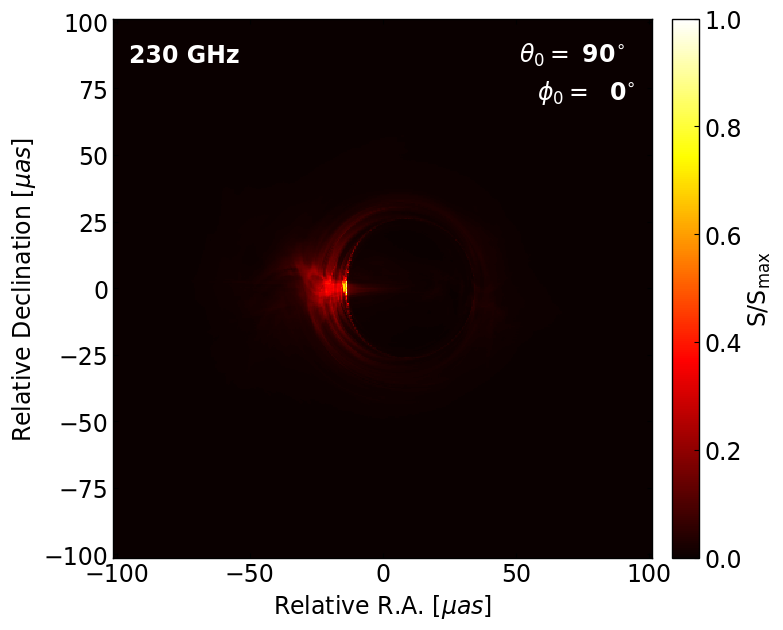

In [16]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [17]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [18]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 10, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc10/BHOSS_CODE
96, flux: 1.578097 at 9008.139053
97, flux: 1.532838 at 9017.844868
98, flux: 1.520903 at 9027.551100
99, flux: 1.520994 at 9038.646851
100, flux: 1.521945 at 9048.356431
101, flux: 1.521874 at 9058.061637
102, flux: 1.515480 at 9067.764826
103, flux: 1.484756 at 9077.464542
104, flux: 1.439913 at 9088.552963
105, flux: 1.414187 at 9098.254801
106, flux: 1.403013 at 9107.957635
107, flux: 1.372682 at 9117.659184
108, flux: 1.351117 at 9127.363548
109, flux: 1.363152 at 9138.452062
110, flux: 1.386846 at 9148.158890
111, flux: 1.425745 at 9157.868704
112, flux: 1.457415 at 9167.579583
113, flux: 1.481189 at 9178.672003
114, flux: 1.505219 at 9188.377169
115, flux: 1.516561 at 9198.079088
116, flux: 1.507621 at 9207.781556
117, flux: 1.491068 at 9217.482565
118, flux: 1.482389 at 9228.573654
119, flux: 1.470150 at 9238.281441
120, flux: 1.474014 at 9247.990304
121, flux: 1.491546 at 9257.698128
122, flux:

In [19]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [20]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.030816 Jy, the density scale = 4.500000e-19


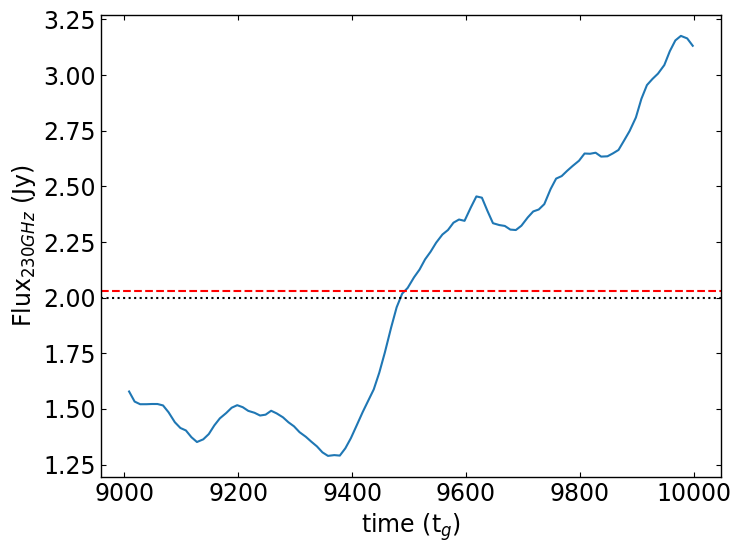

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [22]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 1.578097 Jy at 9008.139053
97:: 1.532838 Jy at 9017.844868
98:: 1.520903 Jy at 9027.551100
99:: 1.520994 Jy at 9038.646851
100:: 1.521945 Jy at 9048.356431
101:: 1.521874 Jy at 9058.061637
102:: 1.515480 Jy at 9067.764826
103:: 1.484756 Jy at 9077.464542
104:: 1.439913 Jy at 9088.552963
105:: 1.414187 Jy at 9098.254801
106:: 1.403013 Jy at 9107.957635
107:: 1.372682 Jy at 9117.659184
108:: 1.351117 Jy at 9127.363548
109:: 1.363152 Jy at 9138.452062
110:: 1.386846 Jy at 9148.158890
111:: 1.425745 Jy at 9157.868704
112:: 1.457415 Jy at 9167.579583
113:: 1.481189 Jy at 9178.672003
114:: 1.505219 Jy at 9188.377169
115:: 1.516561 Jy at 9198.079088
116:: 1.507621 Jy at 9207.781556
117:: 1.491068 Jy at 9217.482565
118:: 1.482389 Jy at 9228.573654
119:: 1.470150 Jy at 9238.281441
120:: 1.474014 Jy at 9247.990304
121:: 1.491546 Jy at 9257.698128
122:: 1.479697 Jy at 9267.401850
123:: 1.462053 Jy at 9278.487308
124:: 1.439580 Jy at 9288.189770
125:: 1.421557 Jy at 9297.894634
126:: 1.395300

In [23]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc30/BHOSS_CODE
96, flux: 1.599707 at 9008.139053
97, flux: 1.552323 at 9017.844868
98, flux: 1.536928 at 9027.551100
99, flux: 1.529027 at 9038.646851
100, flux: 1.530785 at 9048.356431
101, flux: 1.532954 at 9058.061637
102, flux: 1.527138 at 9067.764826
103, flux: 1.491381 at 9077.464542
104, flux: 1.443680 at 9088.552963
105, flux: 1.415175 at 9098.254801
106, flux: 1.404413 at 9107.957635
107, flux: 1.373756 at 9117.659184
108, flux: 1.351529 at 9127.363548
109, flux: 1.357949 at 9138.452062
110, flux: 1.379814 at 9148.158890
111, flux: 1.415595 at 9157.868704
112, flux: 1.446630 at 9167.579583
113, flux: 1.472421 at 9178.672003
114, flux: 1.493002 at 9188.377169
115, flux: 1.485902 at 9198.079088
116, flux: 1.465786 at 9207.781556
117, flux: 1.445434 at 9217.482565
118, flux: 1.439391 at 9228.573654
119, flux: 1.425158 at 9238.281441
120, flux: 1.427199 at 9247.990304
121, flux: 1.444475 at 9257.698128
122, flux:

In [24]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [25]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.977296 Jy, the density scale = 4.350000e-19


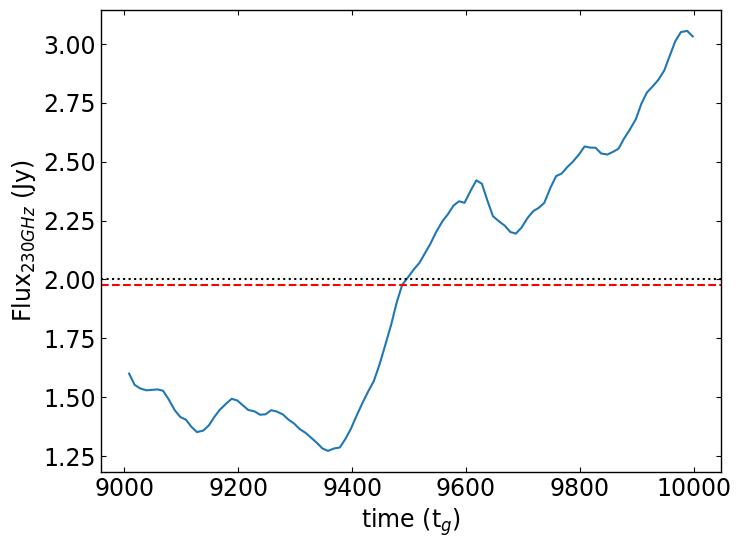

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [27]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 1.599707 Jy at 9008.139053
97:: 1.552323 Jy at 9017.844868
98:: 1.536928 Jy at 9027.551100
99:: 1.529027 Jy at 9038.646851
100:: 1.530785 Jy at 9048.356431
101:: 1.532954 Jy at 9058.061637
102:: 1.527138 Jy at 9067.764826
103:: 1.491381 Jy at 9077.464542
104:: 1.443680 Jy at 9088.552963
105:: 1.415175 Jy at 9098.254801
106:: 1.404413 Jy at 9107.957635
107:: 1.373756 Jy at 9117.659184
108:: 1.351529 Jy at 9127.363548
109:: 1.357949 Jy at 9138.452062
110:: 1.379814 Jy at 9148.158890
111:: 1.415595 Jy at 9157.868704
112:: 1.446630 Jy at 9167.579583
113:: 1.472421 Jy at 9178.672003
114:: 1.493002 Jy at 9188.377169
115:: 1.485902 Jy at 9198.079088
116:: 1.465786 Jy at 9207.781556
117:: 1.445434 Jy at 9217.482565
118:: 1.439391 Jy at 9228.573654
119:: 1.425158 Jy at 9238.281441
120:: 1.427199 Jy at 9247.990304
121:: 1.444475 Jy at 9257.698128
122:: 1.439056 Jy at 9267.401850
123:: 1.426148 Jy at 9278.487308
124:: 1.404298 Jy at 9288.189770
125:: 1.388220 Jy at 9297.894634
126:: 1.364894

In [28]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 50, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc50/BHOSS_CODE
96, flux: 1.615281 at 9008.139053
97, flux: 1.567553 at 9017.844868
98, flux: 1.544279 at 9027.551100
99, flux: 1.522301 at 9038.646851
100, flux: 1.525111 at 9048.356431
101, flux: 1.529851 at 9058.061637
102, flux: 1.520277 at 9067.764826
103, flux: 1.481084 at 9077.464542
104, flux: 1.441778 at 9088.552963
105, flux: 1.418822 at 9098.254801
106, flux: 1.415503 at 9107.957635
107, flux: 1.390120 at 9117.659184
108, flux: 1.369742 at 9127.363548
109, flux: 1.372656 at 9138.452062
110, flux: 1.381461 at 9148.158890
111, flux: 1.411611 at 9157.868704
112, flux: 1.442466 at 9167.579583
113, flux: 1.484376 at 9178.672003
114, flux: 1.485805 at 9188.377169
115, flux: 1.463703 at 9198.079088
116, flux: 1.440086 at 9207.781556
117, flux: 1.416864 at 9217.482565
118, flux: 1.412856 at 9228.573654
119, flux: 1.398755 at 9238.281441
120, flux: 1.393871 at 9247.990304
121, flux: 1.417306 at 9257.698128
122, flux:

In [29]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [30]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.923307 Jy, the density scale = 4.100000e-19


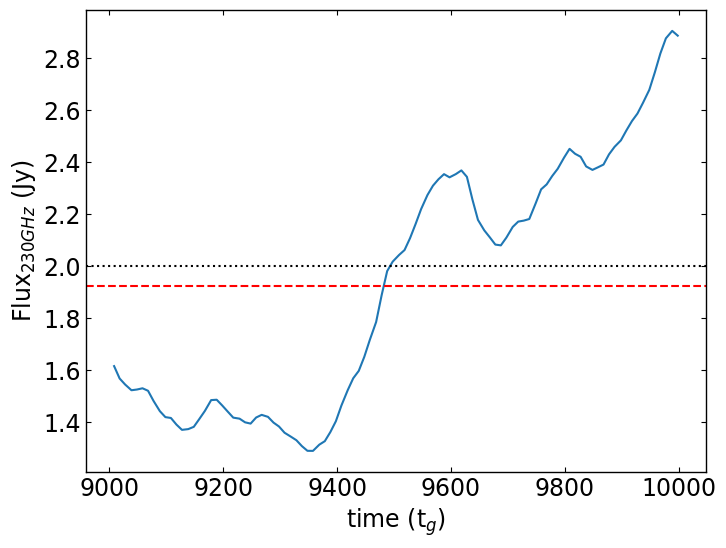

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [32]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 1.615281 Jy at 9008.139053
97:: 1.567553 Jy at 9017.844868
98:: 1.544279 Jy at 9027.551100
99:: 1.522301 Jy at 9038.646851
100:: 1.525111 Jy at 9048.356431
101:: 1.529851 Jy at 9058.061637
102:: 1.520277 Jy at 9067.764826
103:: 1.481084 Jy at 9077.464542
104:: 1.441778 Jy at 9088.552963
105:: 1.418822 Jy at 9098.254801
106:: 1.415503 Jy at 9107.957635
107:: 1.390120 Jy at 9117.659184
108:: 1.369742 Jy at 9127.363548
109:: 1.372656 Jy at 9138.452062
110:: 1.381461 Jy at 9148.158890
111:: 1.411611 Jy at 9157.868704
112:: 1.442466 Jy at 9167.579583
113:: 1.484376 Jy at 9178.672003
114:: 1.485805 Jy at 9188.377169
115:: 1.463703 Jy at 9198.079088
116:: 1.440086 Jy at 9207.781556
117:: 1.416864 Jy at 9217.482565
118:: 1.412856 Jy at 9228.573654
119:: 1.398755 Jy at 9238.281441
120:: 1.393871 Jy at 9247.990304
121:: 1.417306 Jy at 9257.698128
122:: 1.427556 Jy at 9267.401850
123:: 1.419869 Jy at 9278.487308
124:: 1.397804 Jy at 9288.189770
125:: 1.382571 Jy at 9297.894634
126:: 1.358693

In [46]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc70/BHOSS_CODE
96, flux: 1.704228 at 9008.139053
97, flux: 1.644037 at 9017.844868
98, flux: 1.596899 at 9027.551100
99, flux: 1.572567 at 9038.646851
100, flux: 1.584633 at 9048.356431
101, flux: 1.603630 at 9058.061637
102, flux: 1.600101 at 9067.764826
103, flux: 1.554316 at 9077.464542
104, flux: 1.536429 at 9088.552963
105, flux: 1.505288 at 9098.254801
106, flux: 1.506909 at 9107.957635
107, flux: 1.499264 at 9117.659184
108, flux: 1.476750 at 9127.363548
109, flux: 1.436013 at 9138.452062
110, flux: 1.439548 at 9148.158890
111, flux: 1.489292 at 9157.868704
112, flux: 1.523245 at 9167.579583
113, flux: 1.547579 at 9178.672003
114, flux: 1.556404 at 9188.377169
115, flux: 1.546088 at 9198.079088
116, flux: 1.505187 at 9207.781556
117, flux: 1.478179 at 9217.482565
118, flux: 1.494754 at 9228.573654
119, flux: 1.498959 at 9238.281441
120, flux: 1.497708 at 9247.990304
121, flux: 1.562978 at 9257.698128
122, flux:

In [47]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [48]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.013553 Jy, the density scale = 3.950000e-19


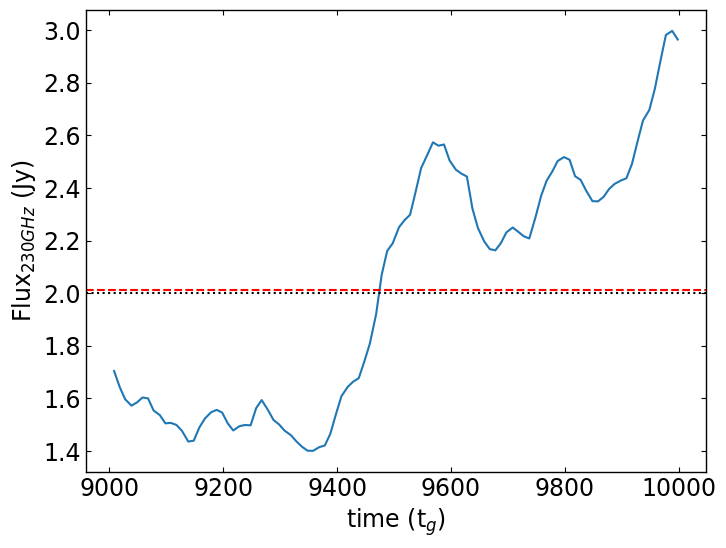

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [50]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 1.704228 Jy at 9008.139053
97:: 1.644037 Jy at 9017.844868
98:: 1.596899 Jy at 9027.551100
99:: 1.572567 Jy at 9038.646851
100:: 1.584633 Jy at 9048.356431
101:: 1.603630 Jy at 9058.061637
102:: 1.600101 Jy at 9067.764826
103:: 1.554316 Jy at 9077.464542
104:: 1.536429 Jy at 9088.552963
105:: 1.505288 Jy at 9098.254801
106:: 1.506909 Jy at 9107.957635
107:: 1.499264 Jy at 9117.659184
108:: 1.476750 Jy at 9127.363548
109:: 1.436013 Jy at 9138.452062
110:: 1.439548 Jy at 9148.158890
111:: 1.489292 Jy at 9157.868704
112:: 1.523245 Jy at 9167.579583
113:: 1.547579 Jy at 9178.672003
114:: 1.556404 Jy at 9188.377169
115:: 1.546088 Jy at 9198.079088
116:: 1.505187 Jy at 9207.781556
117:: 1.478179 Jy at 9217.482565
118:: 1.494754 Jy at 9228.573654
119:: 1.498959 Jy at 9238.281441
120:: 1.497708 Jy at 9247.990304
121:: 1.562978 Jy at 9257.698128
122:: 1.593689 Jy at 9267.401850
123:: 1.555997 Jy at 9278.487308
124:: 1.518144 Jy at 9288.189770
125:: 1.501275 Jy at 9297.894634
126:: 1.477700

In [51]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 90, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc90/BHOSS_CODE
96, flux: 1.611718 at 9008.139053
97, flux: 1.582322 at 9017.844868
98, flux: 1.554512 at 9027.551100
99, flux: 1.537072 at 9038.646851
100, flux: 1.562891 at 9048.356431
101, flux: 1.551477 at 9058.061637
102, flux: 1.547668 at 9067.764826
103, flux: 1.498326 at 9077.464542
104, flux: 1.463869 at 9088.552963
105, flux: 1.441717 at 9098.254801
106, flux: 1.462628 at 9107.957635
107, flux: 1.466522 at 9117.659184
108, flux: 1.432170 at 9127.363548
109, flux: 1.420171 at 9138.452062
110, flux: 1.418730 at 9148.158890
111, flux: 1.466184 at 9157.868704
112, flux: 1.502852 at 9167.579583
113, flux: 1.515976 at 9178.672003
114, flux: 1.488531 at 9188.377169
115, flux: 1.482328 at 9198.079088
116, flux: 1.471272 at 9207.781556
117, flux: 1.465740 at 9217.482565
118, flux: 1.502673 at 9228.573654
119, flux: 1.515394 at 9238.281441
120, flux: 1.494062 at 9247.990304
121, flux: 1.514642 at 9257.698128
122, flux:

In [52]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [53]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.952081 Jy, the density scale = 3.700000e-19


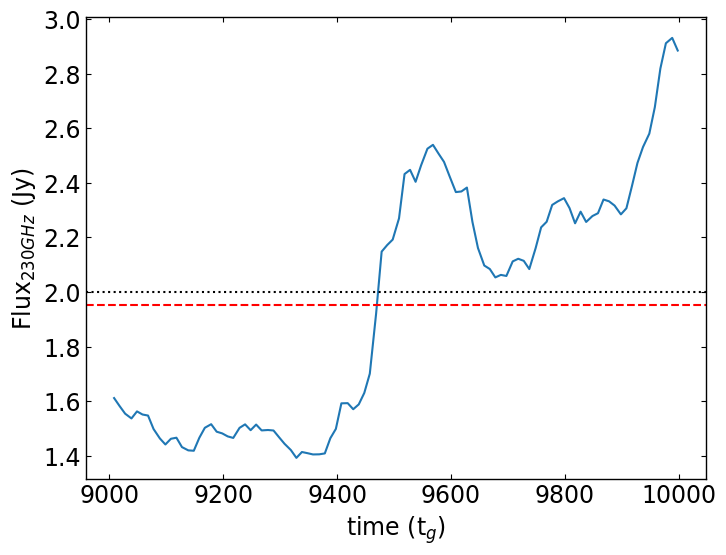

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [55]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 1.611718 Jy at 9008.139053
97:: 1.582322 Jy at 9017.844868
98:: 1.554512 Jy at 9027.551100
99:: 1.537072 Jy at 9038.646851
100:: 1.562891 Jy at 9048.356431
101:: 1.551477 Jy at 9058.061637
102:: 1.547668 Jy at 9067.764826
103:: 1.498326 Jy at 9077.464542
104:: 1.463869 Jy at 9088.552963
105:: 1.441717 Jy at 9098.254801
106:: 1.462628 Jy at 9107.957635
107:: 1.466522 Jy at 9117.659184
108:: 1.432170 Jy at 9127.363548
109:: 1.420171 Jy at 9138.452062
110:: 1.418730 Jy at 9148.158890
111:: 1.466184 Jy at 9157.868704
112:: 1.502852 Jy at 9167.579583
113:: 1.515976 Jy at 9178.672003
114:: 1.488531 Jy at 9188.377169
115:: 1.482328 Jy at 9198.079088
116:: 1.471272 Jy at 9207.781556
117:: 1.465740 Jy at 9217.482565
118:: 1.502673 Jy at 9228.573654
119:: 1.515394 Jy at 9238.281441
120:: 1.494062 Jy at 9247.990304
121:: 1.514642 Jy at 9257.698128
122:: 1.493225 Jy at 9267.401850
123:: 1.494745 Jy at 9278.487308
124:: 1.492959 Jy at 9288.189770
125:: 1.468398 Jy at 9297.894634
126:: 1.444204